In [1]:
import pandas as pd
import numpy as np
import requests
import csv

import matplotlib.pyplot as plt 
import seaborn as sb

In [2]:
import pandas as pd
import numpy as np
import requests
import csv
# import other required libraries

# get data from API (url:"https://covid19.saglik.gov.tr/covid19api?getir=liste")
response = requests.get("https://covid19.saglik.gov.tr/covid19api?getir=liste", data={'key':'value'})

key_list = response.json()[0].keys()
field=[]
for i in key_list:
    field.append(i)

response = response.json()

with open('covid19turkey.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=field)
    writer.writeheader()
    writer.writerows(response)

# save df to csv as 'covid19turkey.csv'

# Print names of columns and their datatypes
df = pd.read_csv('covid19turkeyy.csv')
df.columns

Index(['tarih', 'gunluk_test', 'gunluk_vaka', 'gunluk_vefat',
       'gunluk_iyilesen', 'toplam_test', 'toplam_vaka', 'toplam_vefat',
       'toplam_iyilesen', 'toplam_yogun_bakim', 'toplam_entube',
       'hastalarda_zaturre_oran', 'agir_hasta_sayisi', 'yatak_doluluk_orani',
       'eriskin_yogun_bakim_doluluk_orani', 'ventilator_doluluk_orani',
       'ortalama_filyasyon_suresi', 'ortalama_temasli_tespit_suresi',
       'filyasyon_orani'],
      dtype='object')

In [3]:
# Print their datatypes
df.dtypes


tarih                                 object
gunluk_test                          float64
gunluk_vaka                          float64
gunluk_vefat                         float64
gunluk_iyilesen                      float64
toplam_test                           object
toplam_vaka                          float64
toplam_vefat                         float64
toplam_iyilesen                      float64
toplam_yogun_bakim                   float64
toplam_entube                        float64
hastalarda_zaturre_oran               object
agir_hasta_sayisi                    float64
yatak_doluluk_orani                   object
eriskin_yogun_bakim_doluluk_orani     object
ventilator_doluluk_orani              object
ortalama_filyasyon_suresi            float64
ortalama_temasli_tespit_suresi       float64
filyasyon_orani                       object
dtype: object

In [4]:
# Show summary of records.
df.describe()

,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_vaka,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,agir_hasta_sayisi,ortalama_filyasyon_suresi,ortalama_temasli_tespit_suresi
count,232.000000,232.000000,232.000000,224.000000,248.000000,242.000000,232.000000,123.000000,123.000000,108.000000,0.0,44.000000
mean,68.204927,167.951341,48.495690,165.234906,259.133770,90.001260,196.441974,326.510415,439.190894,228.971546,NaN,8.725000
std,38.771899,371.897621,30.063713,348.711399,317.426186,537.662011,105.126372,387.040743,252.867264,337.978908,NaN,1.493104
min,7.533000,1.003000,14.000000,1.002000,1.000000,1.000000,1.042000,1.018000,1.006000,1.017000,NaN,7.500000
25%,38.340250,1.423250,19.000000,1.214000,153.307750,4.715500,126.728750,1.250000,307.000000,1.417750,NaN,7.600000
50%,49.508000,1.706000,47.500000,1.506500,221.036000,5.836500,208.982000,1.814000,387.000000,1.762000,NaN,8.000000
75%,110.014250,3.117500,71.250000,3.996500,303.302750,8.652500,267.533500,722.500000,555.500000,583.750000,NaN,10.000000
max,149.942000,2026.000000,127.000000,1382.000000,3629.000000,5206.000000,786.000000,998.000000,995.000000,991.000000,NaN,12.000000


In [5]:
# convert "tarih" attribute to datetime
# be sure about date format in 'yyyy-mm-dd', if not correct them  

df['tarih'] = pd.to_datetime(arg=df['tarih'], dayfirst=True)
df.head(5)


,tarih,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_test,toplam_vaka,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,hastalarda_zaturre_oran,agir_hasta_sayisi,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani,ortalama_filyasyon_suresi,ortalama_temasli_tespit_suresi,filyasyon_orani
0,2020-11-13,149.942,3.045,93.0,2.010,15.863.833,407.939,11.326,348.804,NaN,NaN,"4,2",3.356,"53,5","69,9","34,9",NaN,12.0,"99,7"
1,2020-11-12,148.482,2.841,88.0,2.181,15.713.891,404.894,11.233,346.794,NaN,NaN,"4,2",3.230,"53,5","69,9","34,9",NaN,12.0,"99,7"
2,2020-11-11,145.989,2.693,86.0,2.112,15.565.409,402.053,11.145,344.613,NaN,NaN,"4,2",3.095,"53,5","69,9","34,9",NaN,12.0,99.7
3,2020-11-10,146.198,2.529,87.0,2.215,15.419.420,399.360,11.059,342.501,NaN,NaN,"4,2",3.001,"53,5","69,9","34,9",NaN,12.0,99.7
4,2020-11-09,145.411,2.576,85.0,2.047,15.273.222,396.831,10.972,340.286,NaN,NaN,4.2,2.867,"53,5","69,9",34.9,NaN,12.0,99.7


In [6]:
# move "tarih" attribute to first column
# sort data according to "tarih" in ascending order

df.sort_values(by='tarih',ascending=True, inplace=True, ignore_index=True)

In [7]:
df.head(50)

,tarih,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_test,toplam_vaka,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,hastalarda_zaturre_oran,agir_hasta_sayisi,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani,ortalama_filyasyon_suresi,ortalama_temasli_tespit_suresi,filyasyon_orani
0,2020-03-11,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-12,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-13,NaN,NaN,NaN,NaN,NaN,5.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-14,NaN,NaN,NaN,NaN,NaN,6.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-15,NaN,NaN,NaN,NaN,NaN,18.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-16,NaN,NaN,NaN,NaN,NaN,47.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-03-17,NaN,NaN,NaN,NaN,NaN,98.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-03-18,NaN,NaN,NaN,NaN,NaN,191.000,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-03-19,NaN,NaN,NaN,NaN,NaN,359.000,4.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-03-20,NaN,NaN,NaN,NaN,NaN,670.000,9.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# check data if dataframe cell is empty (blank), assign "NaN" value 
# print 5 corrected record as an example

# a = df.fillna(np.nan, inplace=True)
# i dont need this way 

In [9]:
df.isna().sum()

tarih                                  0
gunluk_test                           16
gunluk_vaka                           16
gunluk_vefat                          16
gunluk_iyilesen                       24
toplam_test                           16
toplam_vaka                            0
toplam_vefat                           6
toplam_iyilesen                       16
toplam_yogun_bakim                   125
toplam_entube                        125
hastalarda_zaturre_oran              140
agir_hasta_sayisi                    140
yatak_doluluk_orani                  204
eriskin_yogun_bakim_doluluk_orani    204
ventilator_doluluk_orani             204
ortalama_filyasyon_suresi            248
ortalama_temasli_tespit_suresi       204
filyasyon_orani                      204
dtype: int64

In [10]:
# check data types, be sure all data except "tarih" attibute is numeric. If not, convert them to numeric
df.isnull()

,tarih,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_test,toplam_vaka,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,hastalarda_zaturre_oran,agir_hasta_sayisi,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani,ortalama_filyasyon_suresi,ortalama_temasli_tespit_suresi,filyasyon_orani
0,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False
244,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False
245,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False
246,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   tarih                              248 non-null    datetime64[ns]
 1   gunluk_test                        232 non-null    float64       
 2   gunluk_vaka                        232 non-null    float64       
 3   gunluk_vefat                       232 non-null    float64       
 4   gunluk_iyilesen                    224 non-null    float64       
 5   toplam_test                        232 non-null    object        
 6   toplam_vaka                        248 non-null    float64       
 7   toplam_vefat                       242 non-null    float64       
 8   toplam_iyilesen                    232 non-null    float64       
 9   toplam_yogun_bakim                 123 non-null    float64       
 10  toplam_entube                      123

In [12]:
df['toplam_test']= pd.to_numeric(df['toplam_test'], downcast='float', errors='coerce')
df['hastalarda_zaturre_oran']= pd.to_numeric(df['hastalarda_zaturre_oran'], downcast='integer', errors='coerce')
df['yatak_doluluk_orani']= pd.to_numeric(df['yatak_doluluk_orani'], downcast='integer', errors='coerce')
df['eriskin_yogun_bakim_doluluk_orani']= pd.to_numeric(df['eriskin_yogun_bakim_doluluk_orani'], downcast='integer', errors='coerce')
df['ortalama_filyasyon_suresi']= pd.to_numeric(df['ortalama_filyasyon_suresi'], downcast='integer', errors='coerce')
df['filyasyon_orani']= pd.to_numeric(df['filyasyon_orani'], downcast='integer', errors='coerce')
df['ventilator_doluluk_orani']= pd.to_numeric(df['ventilator_doluluk_orani'], downcast='integer', errors='coerce')

df['gunluk_vaka']= pd.to_numeric(df['gunluk_vaka'], downcast='integer', errors='ignore')
df['toplam_test']= pd.to_numeric(df['toplam_test'], downcast='float', errors='ignore')



In [13]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   tarih                              248 non-null    datetime64[ns]
 1   gunluk_test                        232 non-null    float64       
 2   gunluk_vaka                        232 non-null    float64       
 3   gunluk_vefat                       232 non-null    float64       
 4   gunluk_iyilesen                    224 non-null    float64       
 5   toplam_test                        34 non-null     float32       
 6   toplam_vaka                        248 non-null    float64       
 7   toplam_vefat                       242 non-null    float64       
 8   toplam_iyilesen                    232 non-null    float64       
 9   toplam_yogun_bakim                 123 non-null    float64       
 10  toplam_entube                      123

In [15]:
# drop records that at least 60 percent of cells are empty
size=(df.shape[0])

atleast_ = (size * 0.6) 
df.dropna(thresh= atleast_, axis=1, inplace=True )


In [16]:
# print columns names, that have missing values (NaN entry), and also count missing values for each column as following exaxmple:
# There is NaN values in agir_hasta_sayisi column!: 140/241 (NaN/total)
columns = []
value = []
dictt = {}
for key in df.columns:
    columns.append(key)   

for i in df.isna().sum():
    value.append(i)
    
for i in range(len(df.columns)):
    print('There is NaN values in {} column: {}/{} (NaN/total)'.format(columns[i], value[i], len(df.index)))

another_way = df

There is NaN values in tarih column: 0/248 (NaN/total)
There is NaN values in gunluk_test column: 16/248 (NaN/total)
There is NaN values in gunluk_vaka column: 16/248 (NaN/total)
There is NaN values in gunluk_vefat column: 16/248 (NaN/total)
There is NaN values in gunluk_iyilesen column: 24/248 (NaN/total)
There is NaN values in toplam_vaka column: 0/248 (NaN/total)
There is NaN values in toplam_vefat column: 6/248 (NaN/total)
There is NaN values in toplam_iyilesen column: 16/248 (NaN/total)


Text(32.09374999999999, 0.5, 'gunluk vaka')

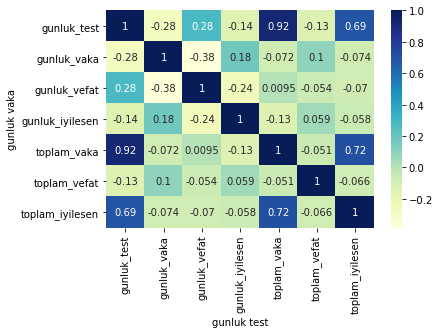

In [17]:
new_df = df.drop('tarih', axis=1)
a = new_df.corr()
sb.heatmap(a,annot=True,cmap="YlGnBu")
plt.scatter(new_df['gunluk_test'],new_df['toplam_vaka'],vmin=20000)
plt.xlabel('gunluk test')
plt.ylabel('gunluk vaka')

##### Data Cleaning

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
def funcAll(column_name):
    if column_name == "toplam_iyilesen" or column_name=="gunluk_test":
        full_val = 'toplam_vaka'
    elif column_name=="gunluk_vaka" or column_name=="toplam_vefat":
        full_val = 'gunluk_test'
    elif column_name =="gunluk_vefat":
        full_val = "gunluk_vaka"
    elif column_name == "gunluk_iyilesen":
        full_val = "gunluk_vefat"
    training_testing = df[[ full_val , column_name]]
    training_testing
    print('----------->>>>', column_name)
    X_train =[]
    X_test =[]
    y_train=[]
    y_test = []

    for i in range(df.shape[0]):
        data = training_testing.loc[i]
        gunluk_test=data[column_name]
        if not np.isnan(gunluk_test):
            X_train.append(data[full_val])
            y_train.append(gunluk_test)
        else:
            X_test.append(data[full_val])
            y_test.append(gunluk_test)
    len(X_train)

    #Create linear regression object 

    poly = PolynomialFeatures(degree=3)

    X_train = np.array(X_train).reshape((-1,1))
    X_test = np.array(X_test).reshape((-1,1))
    y_train = np.array(y_train).reshape((-1,1))
    y_test = np.array(y_test).reshape((-1,1))


    X_train = poly.fit_transform(X_train)

    X_test = poly.transform(X_test)

    y_test.shape

    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)

    predicted_val = model.predict(X_test)

    print(model.score(X_train, y_train))
    
    predicted_val.shape
    n = df[column_name]
    n2 = df[np.isnan(n)][column_name]

    df.loc[np.isnan(n) , column_name] = predicted_val
    df[column_name]



#Fitting Polynomial Regression to fill missing values
def PolyRegImputer(df):
    """
    input: dataframe with missing values
    output: filled dataframe 
    use imported sklearn functions to predict missing values
    """
    new_df = df
    new_df = new_df.drop('toplam_vaka', axis=1)
#     df.isna().values
    for i in new_df.columns[1:]:
        funcAll(i)
    # to-do
    return df
df_filled=PolyRegImputer(df)





----------->>>> gunluk_test
0.9076976069379429
----------->>>> gunluk_vaka
0.10901632238789638
----------->>>> gunluk_vefat
0.18769892611244343
----------->>>> gunluk_iyilesen
0.1039788053373718
----------->>>> toplam_vefat
6.263114421733995e-05
----------->>>> toplam_iyilesen
0.6488835958271075


In [19]:
# df_filled['gunluk_test'] = df_filled['gunluk_test'].astype(int)
# df_filled['gunluk_vaka'] = df_filled['gunluk_vaka'].astype(int)
# df_filled['gunluk_vefat'] = df_filled['gunluk_vefat'].astype(int)
# df_filled['gunluk_iyilesen'] = df_filled['gunluk_iyilesen'].astype(int)
# df_filled['toplam_vaka'] = df_filled['toplam_vaka'].astype(int)
# df_filled['toplam_vefat'] = df_filled['toplam_vefat'].astype(int)
# df_filled['toplam_iyilesen'] = df_filled['toplam_iyilesen'].astype(int)

In [20]:
#OTHER WAY TO CLEANING 

In [21]:
another_way.fillna(np.nan, inplace=True)
another_way.isna().sum()
another_way.interpolate()

,tarih,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_vaka,toplam_vefat,toplam_iyilesen
0,2020-03-11,27.736578,241.826330,66.705321,48.432089,1.000,90.360092,197.224042
1,2020-03-12,27.736578,241.826330,66.705321,48.432089,1.000,90.360092,197.224042
2,2020-03-13,26.809225,236.380443,66.668866,48.391806,5.000,90.368925,186.186358
3,2020-03-14,26.588713,235.033221,66.658267,48.380131,6.000,90.371025,183.518871
4,2020-03-15,24.289781,219.767736,66.493841,48.201124,18.000,90.392916,154.305159
...,...,...,...,...,...,...,...,...
243,2020-11-09,145.411000,2.576000,85.000000,2.047000,396.831,10.972000,340.286000
244,2020-11-10,146.198000,2.529000,87.000000,2.215000,399.360,11.059000,342.501000
245,2020-11-11,145.989000,2.693000,86.000000,2.112000,402.053,11.145000,344.613000
246,2020-11-12,148.482000,2.841000,88.000000,2.181000,404.894,11.233000,346.794000


In [22]:
# scale your data, get mean centered data
from sklearn import preprocessing
new_ = another_way.drop('tarih', axis=1) 

scaler = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(new_), 
                         columns=new_.columns)
df_scaled

,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_vaka,toplam_vefat,toplam_iyilesen
0,0.997980,1.0,1.0,1.737990e-81,0.000000,0.017168,0.999448
1,0.997980,1.0,1.0,1.737990e-81,0.000000,0.017168,0.999448
2,0.997969,1.0,1.0,1.736513e-81,0.001103,0.017170,0.999437
3,0.997966,1.0,1.0,1.736086e-81,0.001378,0.017170,0.999435
4,0.997938,1.0,1.0,1.729526e-81,0.004686,0.017174,0.999407
...,...,...,...,...,...,...,...
243,0.999415,1.0,1.0,3.829213e-83,0.109104,0.001916,0.999582
244,0.999425,1.0,1.0,4.444818e-83,0.109802,0.001933,0.999584
245,0.999422,1.0,1.0,4.067394e-83,0.110544,0.001949,0.999586
246,0.999453,1.0,1.0,4.320232e-83,0.111327,0.001966,0.999588


In [23]:
# calculate correlation 
correlation_df = df_filled.corr()
print('CORRELATION')
correlation_df

CORRELATION


,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_vaka,toplam_vefat,toplam_iyilesen
gunluk_test,1.000000,0.968827,0.965034,-0.965033,-0.800844,0.002598,0.999552
gunluk_vaka,0.968827,1.000000,0.999874,-0.999874,-0.684034,0.001866,0.962311
gunluk_vefat,0.965034,0.999874,1.000000,-1.000000,-0.676862,0.001802,0.958233
gunluk_iyilesen,-0.965033,-0.999874,-1.000000,0.000000,0.676860,-0.001802,-0.958232
toplam_vaka,-0.800844,-0.684034,-0.676862,0.676860,1.000000,-0.050336,-0.816792
toplam_vefat,0.002598,0.001866,0.001802,-0.001802,-0.050336,1.000000,0.003778
toplam_iyilesen,0.999552,0.962311,0.958233,-0.958232,-0.816792,0.003778,1.000000


In [24]:
#CALCULATE covariance matrices
df.cov()

,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_vaka,toplam_vefat,toplam_iyilesen
gunluk_test,2.893646e+07,2.204269e+14,9.352244e+30,-8.995923e+84,-1.367455e+06,7.423396e+03,3.788800e+08
gunluk_vaka,2.204269e+14,1.788921e+21,7.618886e+37,-7.328612e+91,-9.183666e+12,4.191635e+10,2.868037e+15
gunluk_vefat,9.352244e+30,7.618886e+37,3.245647e+54,-3.121990e+108,-3.870734e+29,1.724151e+27,1.216453e+32
gunluk_iyilesen,-8.995923e+84,-7.328612e+91,-3.121990e+108,3.003045e+162,3.723253e+83,-1.658449e+81,-1.170106e+86
toplam_vaka,-1.367455e+06,-9.183666e+12,-3.870734e+29,3.723253e+83,1.007594e+05,-8.485779e+03,-1.826955e+07
toplam_vefat,7.423396e+03,4.191635e+10,1.724151e+27,-1.658449e+81,-8.485779e+03,2.820582e+05,1.413918e+05
toplam_iyilesen,3.788800e+08,2.868037e+15,1.216453e+32,-1.170106e+86,-1.826955e+07,1.413918e+05,4.965319e+09


In [25]:
# plot correlation vs covariance (compare also their squares in a plot)

<AxesSubplot:>

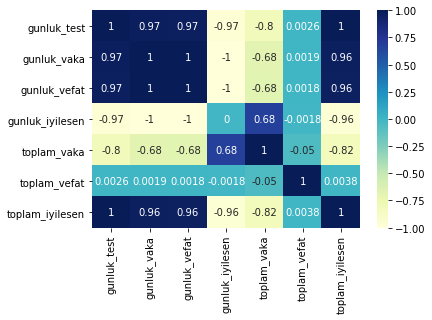

In [26]:
# plot correlation heatmap using Seaborn
new_df = df_filled.drop('tarih', axis=1)
a = new_df.corr()
sb.heatmap(a,annot=True,cmap="YlGnBu")

In [27]:
def PCA(data, n_dim):
    """
    input: unscaled 2D numpy array
    output: transformed data, eigenvalues, eigenvectors
    
    Note: don't use Sklearn for decomposition, use only numpy library
    """
    # convert data to mean centered data
    # calculate covairance matrix 
    # calculate eigenvectors and eigenvalues
    # sort eigenvalues in decending and also eigenvectors
    # get first n_dim eigenvectors
    # transform your data using those eigenvectors
    
    return ...

x_pca, e_val, e_vec = PCA(df_filled.to_numpy)
# plot scatter of transformmed data  
# set title and axis names

TypeError: PCA() missing 1 required positional argument: 'n_dim'

In [39]:
# also using Sklearn 
from sklearn.decomposition import PCA
# pca = PCA() # for n_dim = 2
from sklearn.preprocessing import StandardScaler

# convert transformed data to dataframe
new_df = df_filled.drop('tarih', axis=1) 
scaler = StandardScaler()
scaler.fit(new_df)

# transform your data
scaled_data=scaler.transform(new_df)
scaled_data

pca = PCA(n_components=2)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)
scaled_data.shape


x_pca
# print variance ratios and total variance
# plot cumulative explained variance wrt components

array([[-4.29914700e-01,  5.51461241e-02],
       [-4.29914700e-01,  5.51461241e-02],
       [-4.25465000e-01,  5.42462613e-02],
       [-4.24354022e-01,  5.40210682e-02],
       [-4.11066484e-01,  5.13117844e-02],
       [-3.79274519e-01,  4.47136590e-02],
       [-3.23500636e-01, -1.35167165e-01],
       [-2.25687787e-01, -1.54689891e-01],
       [-5.19981606e-02, -1.89648478e-01],
       [ 2.88929026e-01, -2.51634555e-01],
       [ 6.56518617e-01, -2.91645705e-01],
       [ 1.15421335e+00, -3.38193481e-01],
       [ 1.82910917e+00, -3.86648380e-01],
       [ 2.91120257e+00, -4.40809364e-01],
       [ 5.65104670e+00, -5.04532663e-01],
       [ 3.61504643e+01,  3.04693377e-01],
       [-4.22338629e-01,  5.71935523e-02],
       [-4.20828126e-01,  8.68893234e-02],
       [-4.19481416e-01,  1.29719826e-01],
       [-4.18555810e-01,  1.98925193e-01],
       [-4.16863636e-01,  2.84799239e-01],
       [-4.15594783e-01,  4.02777777e-01],
       [-4.14519719e-01,  5.50767506e-01],
       [-4.

In [ ]:
# compare sklearn and your principal components, print them and check equalty 

In [46]:
# print shape for transformed and original data
print('Transformed -> ',x_pca.shape)
print('Original ->', another_way.shape)

Transformed ->  (248, 2)
Original -> (248, 8)


Text(0, 0.5, 'Second principle component')

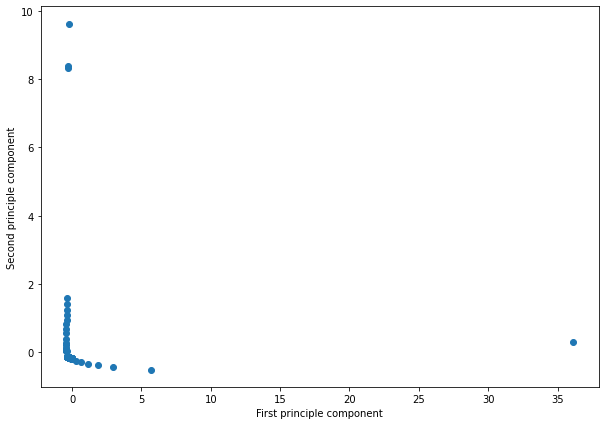

In [48]:
# get also principal components and project original data for given variance=0.9
# plot for principal component pairs

plt.figure(figsize=(10,7))
plt.scatter(x_pca[:,0], x_pca[:, 1])

plt.xlabel('First principle component')
plt.ylabel('Second principle component')


<AxesSubplot:>

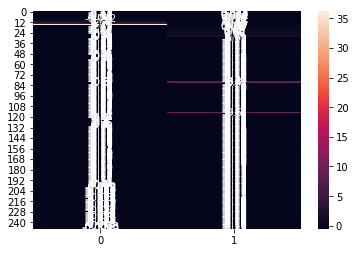

In [50]:
# create a dataframe from pca components 
# plot seaborn heatmap as given sample plot
sb.heatmap(x_pca, annot=True)

In [ ]:
BONUS: PCA Loading Plots

In [ ]:
# plot PCA loading plot with "gunluk_iyilesen" attribute

In [ ]:
# group by data wrt month-year (hint: reformat "tarih" attribute for grouping, then use datatime to_period function)
# plot PCA loading plot with month-year attribute for grouped data